In [7]:
# Import packages
 # import fuzzywizzy?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymongo
import string
import nltk
import re
import os
import sys
import pandas_profiling as pp
import missingno as msno


src_dir = os.path.join(os.getcwd(), '..', '..', 'src')
sys.path.append(src_dir)

# helper functions
from d02_processing.cleaning_signatures import clean_signatures

# Load the "autoreload" extension
%load_ext autoreload

# reload modules so that as you change code in src, it gets loaded
%autoreload

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# open up a mongo cursor and query the db for all the signatures and return a list of unique signatures

# create cursor
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")
curlydb = myclient['Naturaly_Curly_db']
curly_collection = curlydb['curly_profiles']

# Access all the unique items and store them to a list
query_1 = curly_collection.find({})
test = []
for x in query_1:
    test.append(x['signature'])

# This is the number of total unique entire in the database
unique_sigs = list(set(test))
print(len(unique_sigs))

7961


In [4]:
raw_characteristics_df = clean_signatures(unique_sigs)
raw_characteristics_df.head()

,curl_pattern,density,porosity,texture,products
0,NaN,NaN,NaN,NaN,
1,3b,NaN,NaN,NaN,hair type color feria 20 shampoo suave clarify...
2,NaN,thin,NaN,NaN,real generosity is doing someg nice for someon...
3,3c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...
4,4c,NaN,NaN,fine,suze trying to succeed with growing healthy ha...


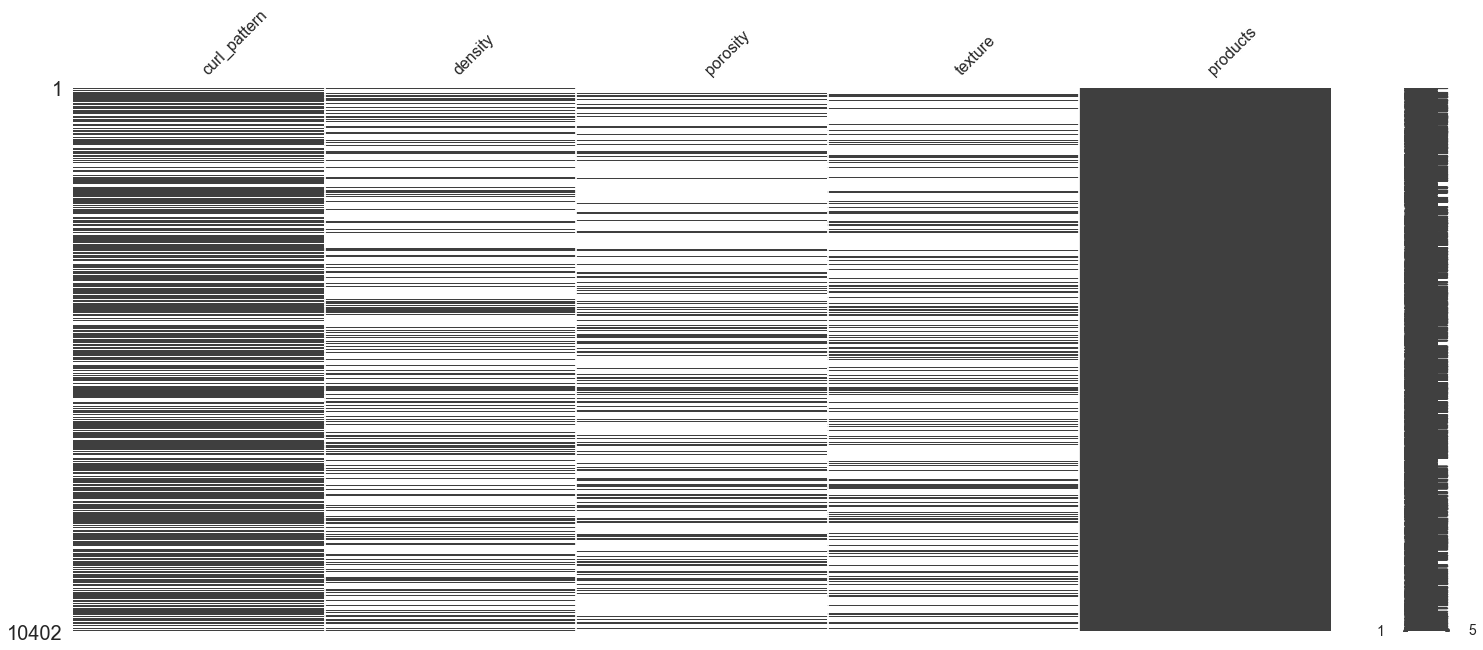

In [9]:
msno.matrix(raw_characteristics_df)

In [10]:
raw_characteristics_df.count()

curl_pattern     7423
density          3031
porosity         2604
texture          2717
products        10402
dtype: int64

In [16]:
all_nan_dropped_df = raw_characteristics_df.dropna(axis=0, how='all', subset=['curl_pattern', 'density', 'porosity', 'texture'], inplace=False)
all_nan_dropped_df.count()

curl_pattern    7423
density         3031
porosity        2604
texture         2717
products        7961
dtype: int64

In [21]:
# check to see what the data frame looks like with a complete set  of characteristics, but its not complete becasue we need to sort out non acceptable values like 'ish'
no_nan_df = raw_characteristics_df.dropna(how='any')
no_nan_df.head(20)

,curl_pattern,density,porosity,texture,products
9,2c,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
10,3a,thin,medium,fine,dormroomcurly blogspot com twitter com dormroo...
98,3a,medium,high,fine,bleached jaw legnth inverted bob cowash suav...
99,2c,medium,high,fine,bleached jaw legnth inverted bob cowash suav...
112,2c,curls,low,medium,whirly experimenting as usual i ve found that...
135,2c,low,ish,,since september 2011 type normal to co wash o...
136,3a,low,ish,,since september 2011 type normal to co wash o...
138,2a,thin,average,medium,since 5 18 10 canopy underneath low still lear...
139,3a,thin,average,medium,since 5 18 10 canopy underneath low still lear...
162,2b,medium,low,fine,my guess at my hair mix of above shoulder le...


In [ ]:
all_nan